In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义常微分方程
def f(x, y):
    return -1/x**2 - y/x - y**2

# 定义各数值方法
def euler_method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h * f(x[i], y[i])
        x[i+1] = x[i] + h
    return x, y

def improved_euler_method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        x[i+1] = x[i] + h
    for i in range(n):
        y_star = y[i] + h * f(x[i], y[i])
        y[i+1] = y[i] + h/2 * (f(x[i], y[i]) + f(x[i+1], y_star))
    return x, y

def heun_method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + 2/3 * h, y[i] + 2/3 * h * k1)
        y[i+1] = y[i] + h/4 * (k1 + 3 * k2)
        x[i+1] = x[i] + h
    return x, y

def midpoint_method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + h/2 * k1)
        y[i+1] = y[i] + h * k2
        x[i+1] = x[i] + h
    return x, y

def runge_kutta_4(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + h/2 * k1)
        k3 = f(x[i] + h/2, y[i] + h/2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x[i+1] = x[i] + h
    return x, y

# 四阶 Adams 预测-校正方法
def adams_predictor_corrector(f, x0, y0, h, n, k=1):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x_copy, y_copy = runge_kutta_4(f, x0, y0, h, k)
    for i in range(k+1):
        x[i] = x_copy[i]
        y[i] = y_copy[i]
    for i in range(k, n):
        x[i+1] = x[i] + h
    for i in range(k, n):
        y_predict = y[i] + h/24 * (55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))
        y_correct = y[i] + h/24 * (9*f(x[i+1], y_predict) + 19*f(x[i], y[i]) - 5*f(x[i-1], y[i-1]) + f(x[i-2], y[i-2]))
        y[i+1] = y_correct
    return x, y

In [3]:
# 初始条件和步长
x0, y0 = 1, -1
h = 0.1
n = int((2 - x0) / h)

In [4]:
# 求解
x_euler, y_euler = euler_method(f, x0, y0, h, n)
x_improved_euler, y_improved_euler = improved_euler_method(f, x0, y0, h, n)
x_heun, y_heun = heun_method(f, x0, y0, h, n)
x_midpoint, y_midpoint = midpoint_method(f, x0, y0, h, n)
x_rk4, y_rk4 = runge_kutta_4(f, x0, y0, h, n)
x_adams, y_adams = adams_predictor_corrector(f, x0, y0, h, n)

In [5]:
# 列表输出计算结果
# print("x values:", x_rk4)
# print("Euler Method:", y_euler)
# print("Improved Euler Method:", y_improved_euler)
# print("Heun Method:", y_heun)
# print("Midpoint Method:", y_midpoint)
print("Runge-Kutta 4 Method:", y_rk4)
print("Adams Predictor-Corrector Method:", y_adams)

Runge-Kutta 4 Method: [-1.         -1.10128267 -1.21007515 -1.33408779 -1.48274937 -1.66944258
 -1.91549522 -2.25869838 -2.77457906 -3.64091601 -5.40099157]
Adams Predictor-Corrector Method: [-1.         -1.10128267 -1.20183519 -1.32615308 -1.47322048 -1.65723027
 -1.89918149 -2.23550548 -2.73844159 -3.57527959 -5.23774669]


In [6]:
from scipy.integrate import solve_ivp
x_span=(1, 2)
y_0=np.array([-1])
sol=solve_ivp(f, x_span, y_0, method='RK45', dense_output=True)
x_values = np.linspace(x_span[0], x_span[1], 1000)
y_values = sol.sol(x_values)
print("Solution: ", sol.sol(x_rk4)[0])
print("Runge-Kutta 4 Method:", y_rk4)
print("Adams Predictor-Corrector Method:", y_adams)

Solution:  [-1.         -1.10128225 -1.21104333 -1.33515717 -1.48241595 -1.66843582
 -1.91565686 -2.2611656  -2.77334584 -3.64293611 -5.40707572]
Runge-Kutta 4 Method: [-1.         -1.10128267 -1.21007515 -1.33408779 -1.48274937 -1.66944258
 -1.91549522 -2.25869838 -2.77457906 -3.64091601 -5.40099157]
Adams Predictor-Corrector Method: [-1.         -1.10128267 -1.20183519 -1.32615308 -1.47322048 -1.65723027
 -1.89918149 -2.23550548 -2.73844159 -3.57527959 -5.23774669]


In [7]:
for i in range(11):
    # print(x_rk4[i])
    # print(y_euler[i])
    # print(y_improved_euler[i])
    # print(y_heun[i])
    # print(y_midpoint[i])
    # print(sol.sol(x_rk4)[0][i])
    # print(y_rk4[i])
    print(y_adams[i])

-1.0
-1.1012826678659193
-1.2018351932142624
-1.3261530760597708
-1.4732204768780879
-1.6572302727892014
-1.8991814924893602
-2.2355054775965906
-2.7384415918600347
-3.5752795942449733
-5.2377466864277435


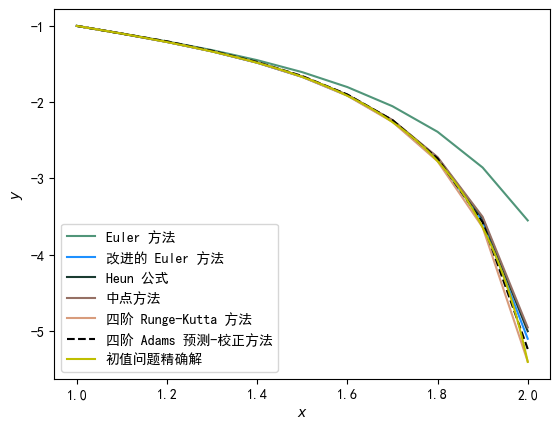

In [8]:
# 画图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 8))
plt.plot(x_euler, y_euler, label='Euler 方法', color='#509579')
plt.plot(x_improved_euler, y_improved_euler, label='改进的 Euler 方法', color='dodgerblue')
plt.plot(x_heun, y_heun, label='Heun 公式', color='#1a3b30')
plt.plot(x_midpoint, y_midpoint, label='中点方法', color='#957064')
plt.plot(x_rk4, y_rk4, label='四阶 Runge-Kutta 方法', color='#d89c7c')
plt.plot(x_adams, y_adams, label='四阶 Adams 预测-校正方法', color='black', linestyle='--')
plt.plot(x_values, y_values[0], label='初值问题精确解', color='y')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()